<h1><center>Analysis on Seattle AirBnB Data</center></h1>

Questions to answer:
1. What are the popular neighborhoods of Seattle Airbnb listings?
2. What type of listings are popular in these neighborhoods?
3. What's the average price per listing across neighborhoods?
4. Is there a relation between the Airbnb availability and price or minimum number of nights to stay?
5. How does the average price per listing across neighborhoods vary across the year?

In [16]:
# Import necessary libraries
import os
import folium
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [17]:
# Setting up the display settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\suhas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [18]:
# Import data
calendar = pd.read_csv("./Data/calendar.csv")
listings = pd.read_csv("./Data/listings.csv")
reviews = pd.read_csv("./Data/reviews.csv")

In [19]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
# Converting to date type and extracting month name
calendar['date'] = calendar['date'].astype('datetime64[ns]')
calendar['Month_Name'] = pd.DatetimeIndex(calendar['date']).month_name()
calendar['Year_Month'] = calendar['date'].dt.strftime('%Y-%m')

# Converting price from string to float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)

In [21]:
listings[listings['id']==5048597]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1310,5048597,https://www.airbnb.com/rooms/5048597,20160104002432,2016-01-04,2 Bedroom Near Space Needle S8,"Experience Seattle's ultimate urban condo living in award winning Shelby, located in the heart of the city's hippest Neighborhood! Enjoy the comforts of home while seeing the best the Emerald City has to offer right outside your front door.",NaN,"Experience Seattle's ultimate urban condo living in award winning Shelby, located in the heart of the city's hippest Neighborhood! Enjoy the comforts of home while seeing the best the Emerald City has to offer right outside your front door. Close to everything including: * The Space Needle * Pike Place Market * Victoria Clipper * Experience Music Project museum (EMP) * Ferries * Seattle Center * Olympic Sculpture Park * Waterfront Boardwalk * Aquarium * Premium Shopping * Trendiest dining only a few steps away!",none,Close to everything including: * The Space Needle * Pike Place Market * Victoria Clipper * Experience Music Project museum (EMP) * Ferries * Seattle Center * Olympic Sculpture Park * Waterfront Boardwalk * Aquarium * Premium Shopping * Trendiest dining only a few steps away!,NaN,NaN,https://a1.muscache.com/ac/pictures/65862730/5643f8f2_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70,https://a1.muscache.com/im/pictures/65862730/5643f8f2_original.jpg?aki_policy=medium,https://a1.muscache.com/ac/pictures/65862730/5643f8f2_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,https://a1.muscache.com/ac/pictures/65862730/5643f8f2_original.jpg?interpolation=lanczos-none&size=x_large_cover&output-format=jpg&output-quality=70,4411144,https://www.airbnb.com/users/show/4411144,Emma,2012-12-15,"Seattle, Washington, United States","My husband and I are travel junkies! We love Barcelona, France, the Bahamas (Harbor Island), you name it. We now have two amazing children (under two yrs old) which means we now rent out our two condos (where we met), moved to a house, and we won't travel as much at least for a few years.\r\n\r\nOur condos are modern, comfortable, and fully loaded with everything you'll need all the way down to the coffee beans! Secured parking and WIFI are included as well as a new 40"" LCD TV.\r\n\r\nWe strive to provide a personal and unique experience for every guest, and take pride in quick responses and attention to detail. We look forward to hearing from you!",within a day,63%,100%,f,"https://a2.muscache.com/ac/users/4411144/profile_pic/1355592705/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:

In [22]:
# Converting price from string to float
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

In [23]:
# Viewing the few rows of the reviews data set
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [24]:
# Missing values in calendar
calendar_na = round((calendar.isnull().sum()/calendar.shape[0]).sort_values(ascending=False)*100,2)
calendar_na[calendar_na>0]

price    32.94
dtype: float64

### Calendar data's missing value treatment

These missing values will be taken care of in the process below. We will use pandas .ffill method after sorting the data by listing_id and date to populate the missing price. It assumes the missing price's value to be the latest available price in the data. It is a fair assumption as missing price in the data is due to the listing was occupied for that time period. For the first day of the data, we obtain the price from the listings data.

In [25]:
# Obtaining price for the first day of the data
calendar_first_day = calendar[calendar['date']=='2016-01-04'].merge(listings[['id','price']],
                                                                    how='left',
                                                                    left_on='listing_id',
                                                                    right_on='id').drop(['id'],axis=1)
calendar_first_day['price'] = calendar_first_day.price_x.combine_first(calendar_first_day.price_y)
calendar_first_day = calendar_first_day.drop(['price_x','price_y'],axis=1)
calendar_first_day = calendar_first_day[calendar.columns]

# Replace the first day data with the processed data
calendar_processed = calendar[calendar['date']!='2016-01-04'].append(calendar_first_day).sort_values(["listing_id",
                                                                                        "date"], ascending = (True, True))

# Obtain neighbourhood information from listings data
calendar_merge = calendar_processed.fillna(method='ffill').merge(listings[['id','neighbourhood_group_cleansed']],
                                                                 how='left',
                                                                 left_on='listing_id',
                                                                 right_on='id').drop(['id'],axis =1)

In [26]:
# Missing values percentage in listings data
listings_na = round((listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)*100,2)
listings_na[listings_na>0]

license                        100.00
square_feet                    97.46 
monthly_price                  60.27 
security_deposit               51.13 
weekly_price                   47.38 
notes                          42.06 
neighborhood_overview          27.03 
cleaning_fee                   26.98 
transit                        24.46 
host_about                     22.50 
host_acceptance_rate           20.25 
review_scores_accuracy         17.23 
review_scores_checkin          17.23 
review_scores_value            17.18 
review_scores_location         17.16 
review_scores_cleanliness      17.10 
review_scores_communication    17.05 
review_scores_rating           16.95 
reviews_per_month              16.42 
first_review                   16.42 
last_review                    16.42 
space                          14.90 
host_response_time             13.70 
host_response_rate             13.70 
neighbourhood                  10.90 
xl_picture_url                 8.38  
thumbnail_ur

The columns required in the analysis have full data, so wouldn't be treating the missing values

In [27]:
# Missing values percentage in reviews data
reviews_na = round((reviews.isnull().sum()/reviews.shape[0]).sort_values(ascending=False)*100,4)
reviews_na[reviews_na>0]

comments    0.0212
dtype: float64

In [28]:
# Number of listings in various neighborhoods
neighbourhood_groups_count = listings['neighbourhood_group_cleansed'].value_counts().reset_index().sort_values('neighbourhood_group_cleansed',ascending=False)
neighbourhood_groups_count.rename(columns={'index': 'Neighbourhood Groups', 'neighbourhood_group_cleansed': 'count'}, inplace=True)
neighbourhood_groups_count

,Neighbourhood Groups,count
0,Other neighborhoods,794
1,Capitol Hill,567
2,Downtown,530
3,Central Area,369
4,Queen Anne,295
5,Ballard,230
6,West Seattle,203
7,Rainier Valley,159
8,University District,122
9,Beacon Hill,118


C:\Users\suhas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


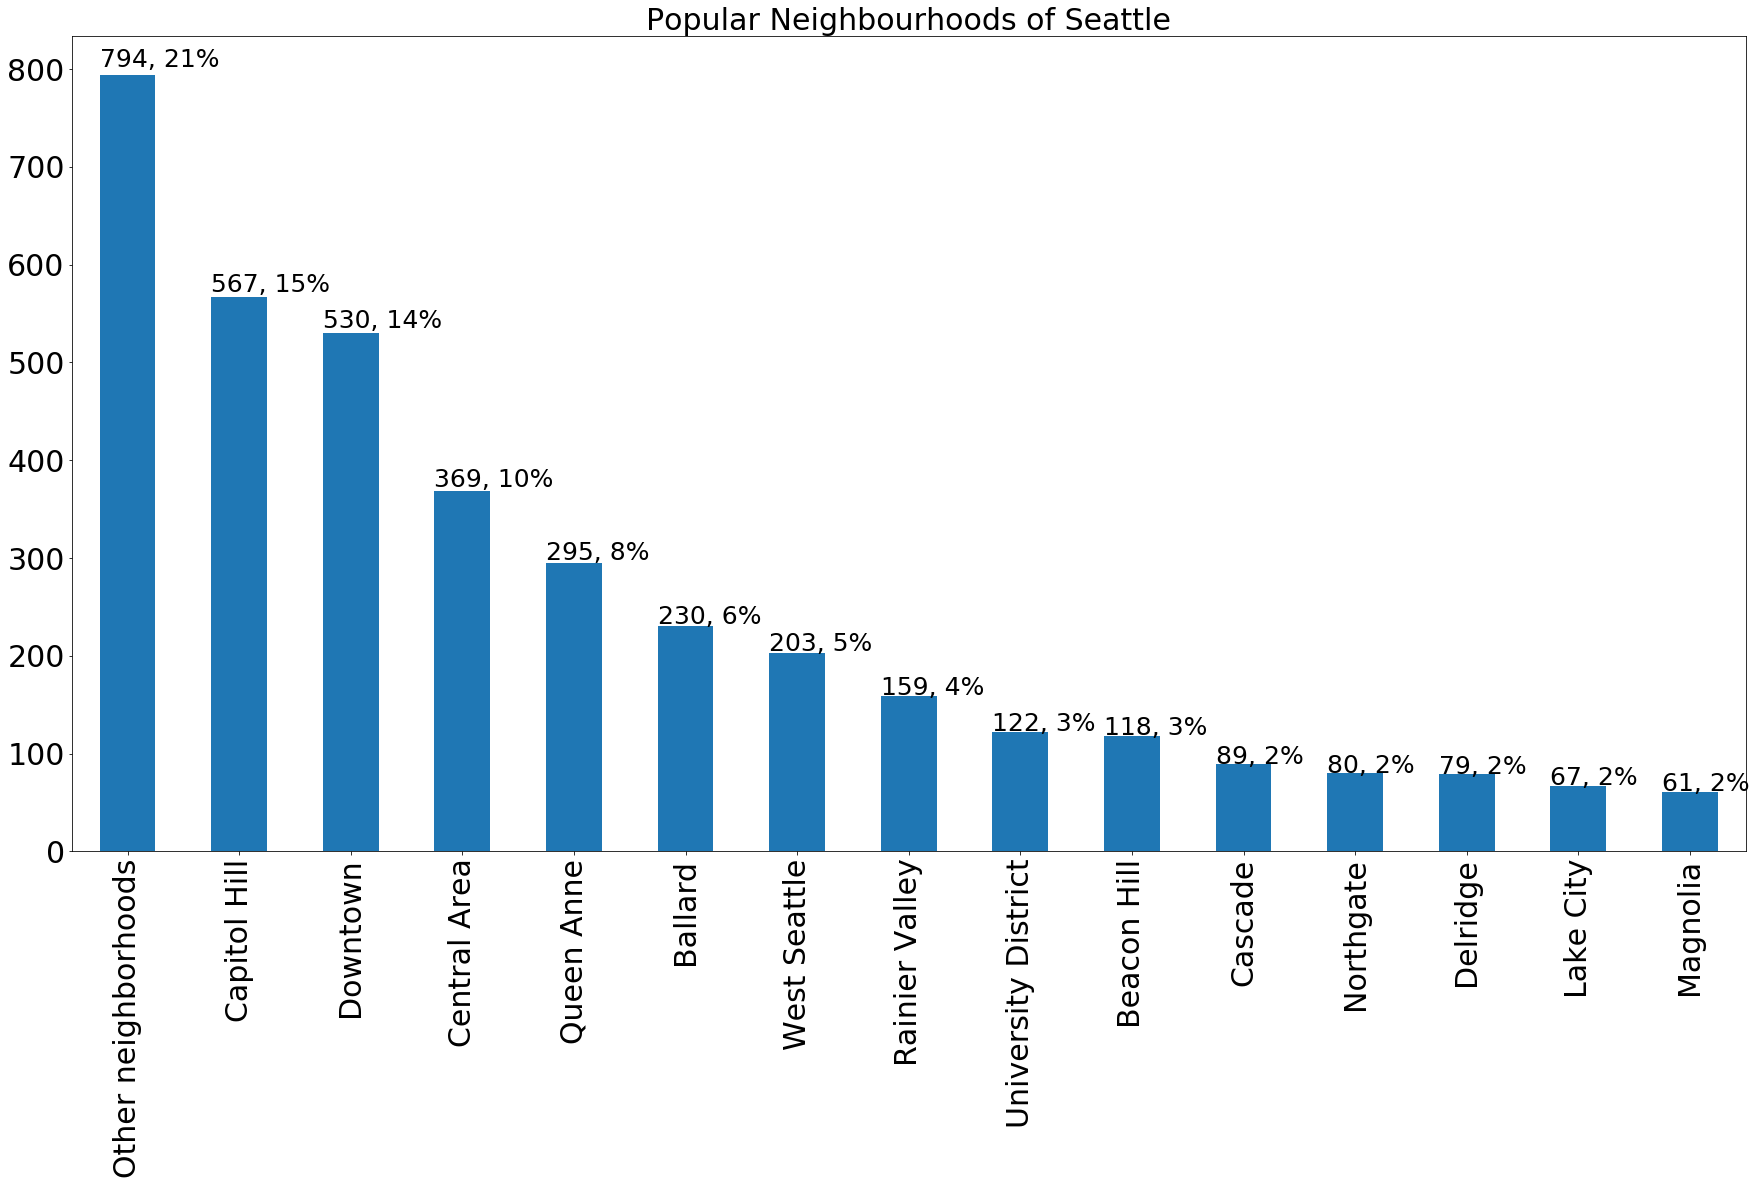

In [29]:
# Plot the top neighborhoods in Seattle
top_neighbourhoods = neighbourhood_groups_count.head(15)
top_neighbourhoods['percent'] = round(top_neighbourhoods['count']/(listings.shape[0])*100,0).astype(int).astype(str)+"%"
ax = top_neighbourhoods.plot(kind='bar', legend=None);
ax.set_xticklabels(top_neighbourhoods['Neighbourhood Groups'])
plt.title('Popular Neighbourhoods of Seattle',fontsize=30);
plt.xticks(fontsize=30);
plt.yticks(fontsize=30);
i=0
for p in ax.patches:
    ax.annotate(str(p.get_height())+", "+top_neighbourhoods['percent'][i],
                (p.get_x(), p.get_height()*1.01),fontsize=25,ha='left')
    i=i+1
#    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()*1.005),fontsize=25,ha='left')
plt.show()

Most of the listings are located in Capitol Hill neighborhood followed by downtown and central area

### Average latitude and longitude per neighbourhood

In [30]:
# Plot the location of neighborhoods in the map by obtaining the average latitude and longitude
neighbourhood_groups_avg = listings[['neighbourhood_group_cleansed',
                                     'latitude',
                                     'longitude']].groupby(['neighbourhood_group_cleansed']).mean().reset_index()
neighbourhood_groups_avg.rename(columns={'neighbourhood_group_cleansed': 'Neighbourhood Groups'},
                                inplace=True)
neighbourhood_groups = neighbourhood_groups_count.merge(neighbourhood_groups_avg,how = 'left', on ='Neighbourhood Groups')
neighbourhood_groups = neighbourhood_groups[neighbourhood_groups['Neighbourhood Groups']!='Other neighborhoods']
neighbourhood_groups

,Neighbourhood Groups,count,latitude,longitude
1,Capitol Hill,567,47.623578,-122.316462
2,Downtown,530,47.611406,-122.337498
3,Central Area,369,47.607715,-122.301760
4,Queen Anne,295,47.634047,-122.357751
5,Ballard,230,47.674525,-122.380150
6,West Seattle,203,47.561976,-122.390300
7,Rainier Valley,159,47.554471,-122.281401
8,University District,122,47.662874,-122.314214
9,Beacon Hill,118,47.569667,-122.306754
10,Cascade,89,47.633757,-122.331631


In [31]:
# Plot the neighborhoods
colors = ['rgb(0,0,153)','rgb(153,0,0)','rgb(153,0,204)','rgb(0,51,0)',
         'rgb(0,51,102)','rgb(153,51,0)','rgb(153,102,102)','rgb(153,102,255)',
         'rgb(0,153,0)','rgb(0,153,153)','rgb(153,153,0)','rgb(153,153,153)',
         'rgb(102,0,0)','rgb(102,0,153)','rgb(255,102,102)','rgb(51,51,51)']

seattle_map = folium.Map(
    location = [47.6062, -122.3321],
    tiles = 'OpenStreetMap',
    zoom_start = 11
)

for i in range(len(neighbourhood_groups)):
    
    folium.Circle(
        location = [neighbourhood_groups.latitude.iloc[i], neighbourhood_groups.longitude.iloc[i]],
        radius = float(neighbourhood_groups.iloc[i]['count']*1.75),
        popup = neighbourhood_groups['Neighbourhood Groups'].iloc[i]+", "+str(neighbourhood_groups.iloc[i]['count'])+" listings",
        color=colors[i],
      fill=True,
      fill_color=colors[i],
        fill_opacity=1
    ).add_to(seattle_map) 
    
seattle_map

### Room type distribution 

In [32]:
# Type of listing across neighborhood
neighbourhood_groups_count = pd.DataFrame(listings[['neighbourhood_group_cleansed',
                                                    'room_type']].pivot_table(index='neighbourhood_group_cleansed',
                                                                              columns='room_type',
                                                                              values=['neighbourhood_group_cleansed',
                                                                                      'room_type'],
                                                                              aggfunc='size').to_records())
neighbourhood_groups_count['Total Count'] = neighbourhood_groups_count.fillna(0)['Entire home/apt']+neighbourhood_groups_count.fillna(0)['Private room']+neighbourhood_groups_count.fillna(0)['Shared room']
neighbourhood_groups_count = neighbourhood_groups_count.sort_values('Total Count',ascending=False)
neighbourhood_groups_count

,neighbourhood_group_cleansed,Entire home/apt,Private room,Shared room,Total Count
11,Other neighborhoods,492.0,274.0,28.0,794.0
2,Capitol Hill,384.0,143.0,40.0,567.0
6,Downtown,471.0,42.0,17.0,530.0
4,Central Area,225.0,140.0,4.0,369.0
12,Queen Anne,231.0,62.0,2.0,295.0
0,Ballard,148.0,82.0,NaN,230.0
16,West Seattle,135.0,67.0,1.0,203.0
13,Rainier Valley,76.0,79.0,4.0,159.0
15,University District,74.0,38.0,10.0,122.0
1,Beacon Hill,57.0,58.0,3.0,118.0


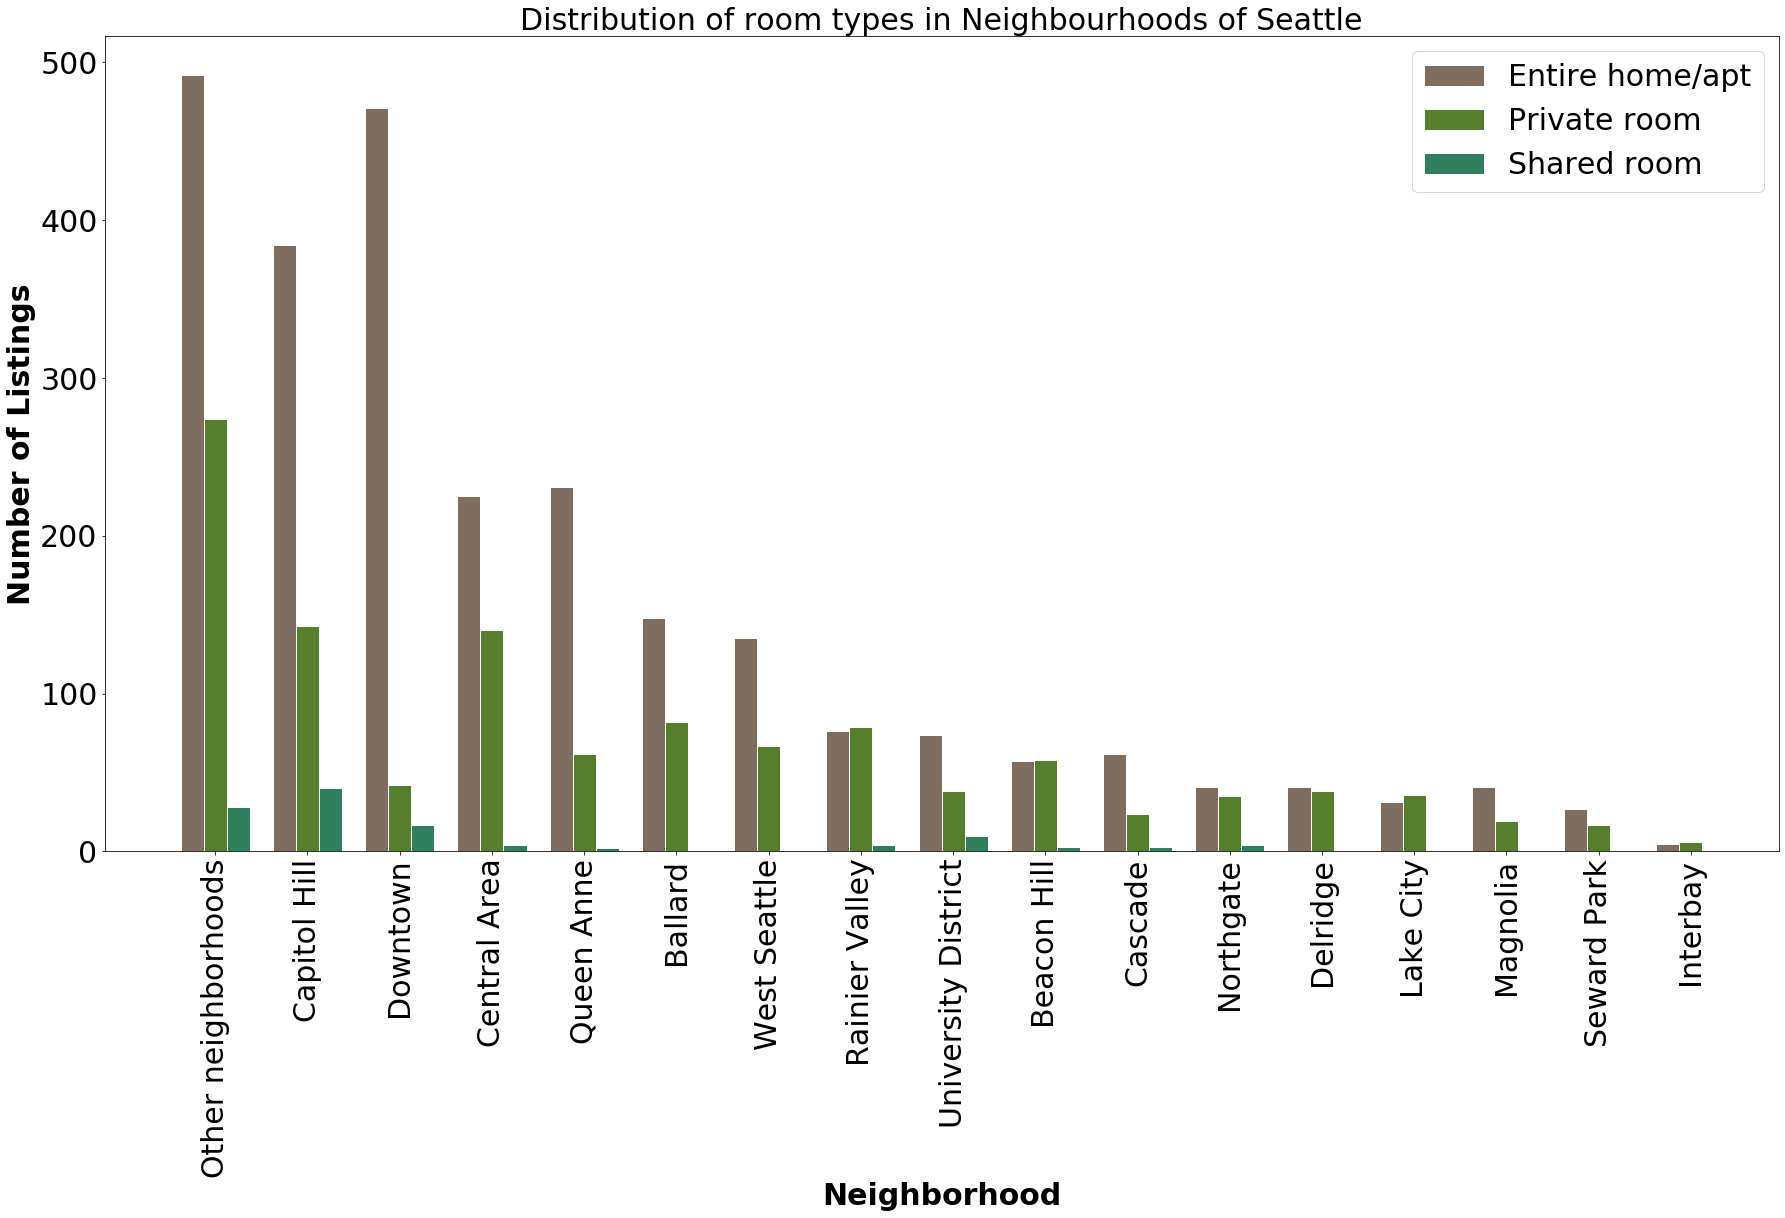

In [33]:
# Plot the distribution of room type
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(neighbourhood_groups_count))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, neighbourhood_groups_count['Entire home/apt'], color='#7f6d5f', width=barWidth, edgecolor='white',
        label='Entire home/apt')
plt.bar(r2, neighbourhood_groups_count['Private room'], color='#557f2d', width=barWidth, edgecolor='white',
        label='Private room')
plt.bar(r3, neighbourhood_groups_count['Shared room'], color='#2d7f5e', width=barWidth, edgecolor='white',
        label='Shared room')

# Add xticks on the middle of the group bars
plt.xlabel('Neighborhood', fontweight='bold', fontsize = 30)
plt.ylabel('Number of Listings', fontweight='bold', fontsize = 30)
plt.xticks([r + barWidth for r in range(len(neighbourhood_groups_count))],
           list(neighbourhood_groups_count['neighbourhood_group_cleansed']),fontsize=30,rotation='vertical')

# Create legend & Show graphic
plt.legend(fontsize=30,loc=1)
plt.title('Distribution of room types in Neighbourhoods of Seattle',fontsize=30);
plt.yticks(fontsize=30);
plt.show()

### Distribution of Price per listing across neighborhoods and room type
How does the average price per room type vary across neighborhood?

In [34]:
# Type of listing across neighborhood
neighbourhood_groups_avg = pd.DataFrame(listings[['neighbourhood_group_cleansed',
                                                    'room_type',
                                                    'price']].pivot_table(index='neighbourhood_group_cleansed',
                                                                              columns='room_type',
                                                                              values=['price'],
                                                                              aggfunc='mean').to_records())
neighbourhood_groups_avg.columns = ['neighbourhood_group_cleansed','Entire home/apt','Private room','Shared room']
neighbourhood_groups_avg

,neighbourhood_group_cleansed,Entire home/apt,Private room,Shared room
0,Ballard,156.925676,66.487805,NaN
1,Beacon Hill,126.175439,66.362069,43.333333
2,Capitol Hill,154.005208,91.832168,44.400000
3,Cascade,162.354839,89.708333,83.333333
4,Central Area,160.577778,78.492857,59.500000
5,Delridge,95.780488,69.789474,NaN
6,Downtown,162.834395,100.142857,54.941176
7,Interbay,153.800000,73.000000,NaN
8,Lake City,127.806452,62.416667,NaN
9,Magnolia,232.390244,67.368421,30.000000


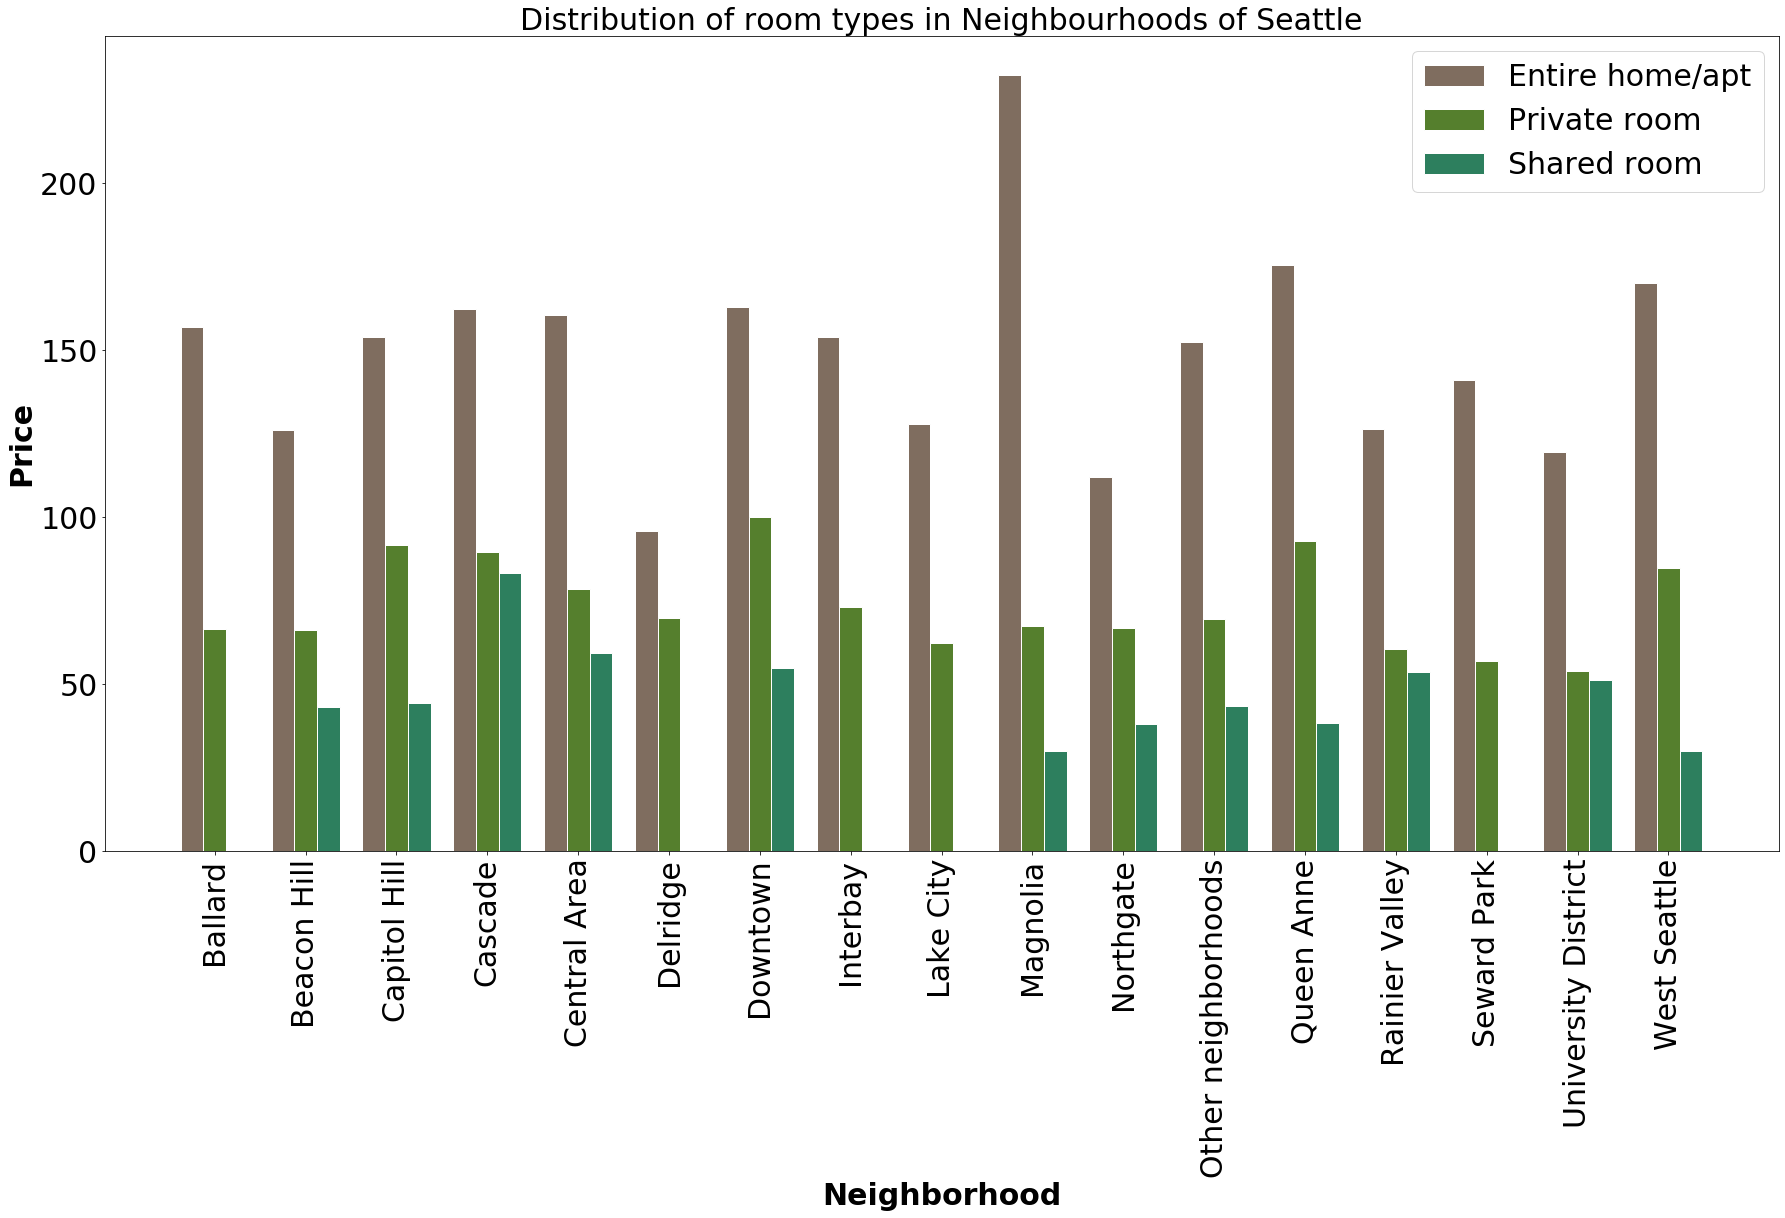

In [35]:
# Plot the distribution of room type
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(neighbourhood_groups_count))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, neighbourhood_groups_avg['Entire home/apt'], color='#7f6d5f', width=barWidth, edgecolor='white',
        label='Entire home/apt')
plt.bar(r2, neighbourhood_groups_avg['Private room'], color='#557f2d', width=barWidth, edgecolor='white',
        label='Private room')
plt.bar(r3, neighbourhood_groups_avg['Shared room'], color='#2d7f5e', width=barWidth, edgecolor='white',
        label='Shared room')

# Add xticks on the middle of the group bars
plt.xlabel('Neighborhood', fontweight='bold', fontsize = 30)
plt.ylabel('Price', fontweight='bold', fontsize = 30)
plt.xticks([r + barWidth for r in range(len(neighbourhood_groups_avg))],
           list(neighbourhood_groups_avg['neighbourhood_group_cleansed']),fontsize=30,rotation='vertical')

# Create legend & Show graphic
plt.legend(fontsize=30,loc=1)
plt.title('Distribution of room types in Neighbourhoods of Seattle',fontsize=30);
plt.yticks(fontsize=30);
plt.show()

In [36]:
# Some stats for Magnolia neighborhood's 'Entire home/apt' type of listing
listings[(listings['neighbourhood_group_cleansed']=='Magnolia')&(listings['room_type']=='Entire home/apt')]['price'].describe()

count    41.000000 
mean     232.390244
std      155.660027
min      95.000000 
25%      129.000000
50%      200.000000
75%      250.000000
max      950.000000
Name: price, dtype: float64

#### Insight:
Magnolia neighborhood seems to have the highest average price per listing for Entire Apartment among all the other neighbourhoods and it has very few listings too. The price range is from 95 dollars per night to 950 per night with 200 dollars per night being median price in the neighborhood. It is an expensive neighborhood to get an Airbnb.

Capitol Hill and Downtown area looks very similar in terms of pricing and they account for majority of listings.

### Does price per listing and minimum nights per stay impact number of days booked?
To identify the correlation between price per listing, minimum nights per stay and number of days booked

In [37]:
# Type of listing across neighborhood
calendar_available_count = pd.DataFrame(calendar[['listing_id',
                                                    'available']].pivot_table(index='listing_id',
                                                                              columns='available',
                                                                              values=['listing_id',
                                                                                      'available'],
                                                                              aggfunc='size').to_records())
listings_subset = listings[['id','neighbourhood_group_cleansed','room_type','price','minimum_nights']]
merged_data = listings_subset.merge(calendar_available_count,
                                    how='left',
                                    left_on='id',
                                    right_on='listing_id').drop(['listing_id','f'],axis =1)
merged_data.columns = ['id','neighbourhood_group_cleansed', 'room_type', 'Price','Minimum Nights', 'Available']

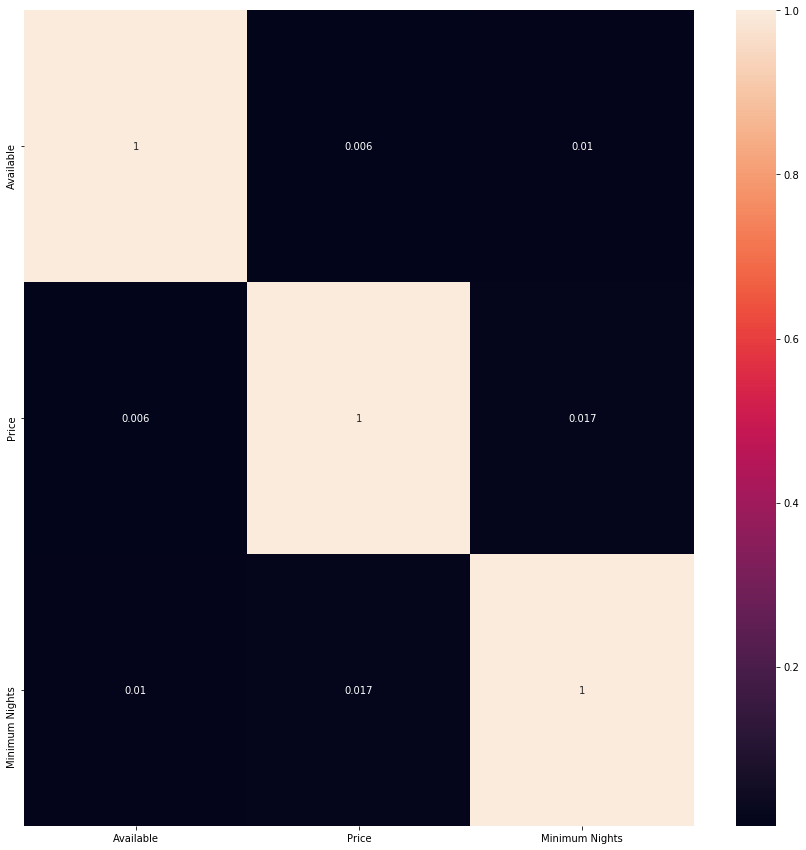

In [47]:
# Correlation plots on the entire Seattle region
df = merged_data[['Available','Price','Minimum Nights']]

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

##### There doesn't seem to be an correlation between them. Let's look at them closely by segregating type of listing

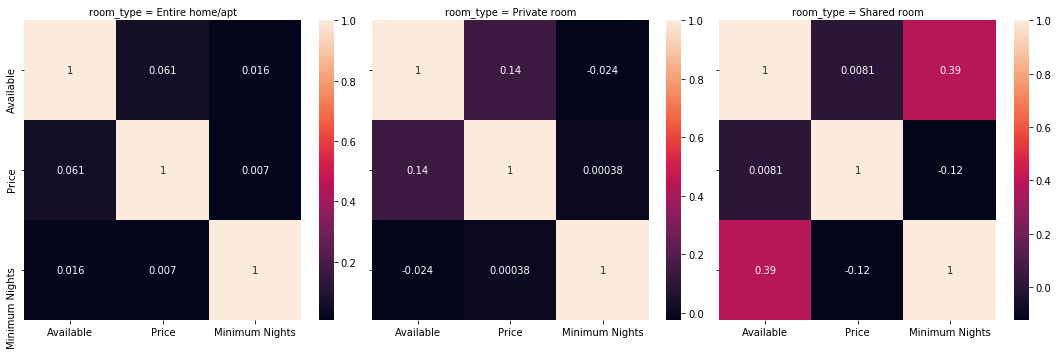

In [39]:
# Correlation plots on the entire Seattle region segregated by room type
df = merged_data[['Available','Price','Minimum Nights','room_type']]
g = sns.FacetGrid(df, col='room_type',height=5)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0, annot=True))

##### There seems to be a bit of correlation between number of days booked and minimum number of nights for Shared room type of listing. 

#### Let's see if there is a variation across popular neighborhoods

In [40]:
# Function to plot correlation matrix for a given neighborhood
def corr_plot_neighborhood(neighborhood):
    '''
    Function to plot the facet plot of correlation graph
    Input: neighborhood (string - Name of the neighborhood in the data)
    Output: Facet chart of correlation matrix between price, availability and minimum number of nights
    '''
    df = merged_data[merged_data['neighbourhood_group_cleansed']==neighborhood][['Available','Price','Minimum Nights','room_type']]
    g = sns.FacetGrid(df, col='room_type',height=5)
    g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0, annot=True))

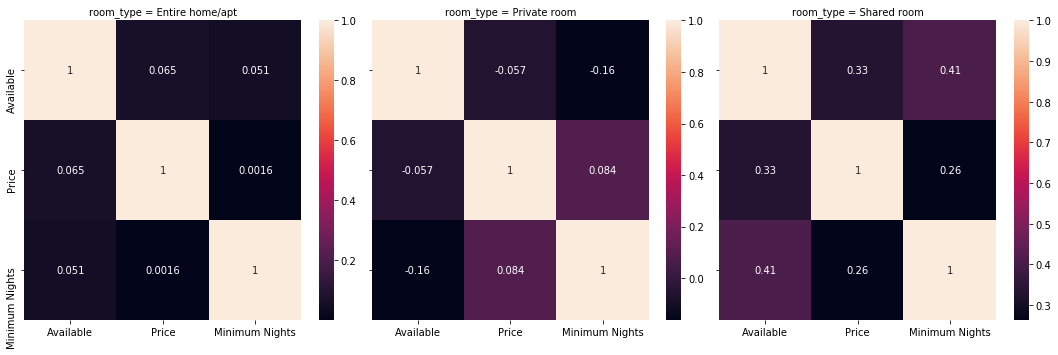

In [41]:
corr_plot_neighborhood('Capitol Hill')

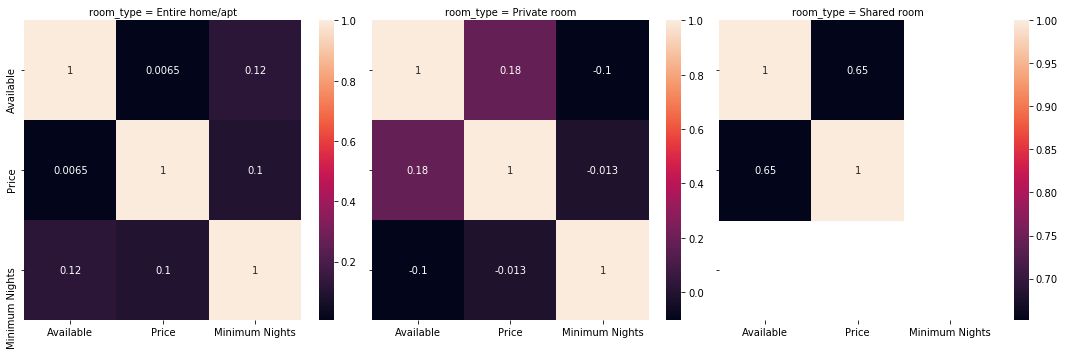

In [42]:
corr_plot_neighborhood('Central Area')

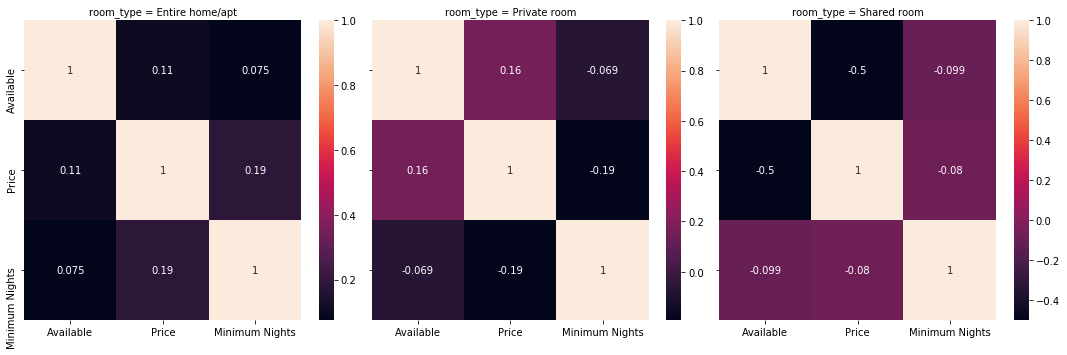

In [43]:
corr_plot_neighborhood('Downtown')

##### Observation:
For shared room type of listing, across top 3 neighborhoods, higher the price of listing, higher are the number of days available to book. Price seems to have correlation to the number of available days.

In [44]:
# Calculate the average price per listing per month
avg_price_listing = calendar_merge[['listing_id',
                                    'Year_Month',
                                    'neighbourhood_group_cleansed',
                                    'price']].groupby(['listing_id',
                                                       'Year_Month',
                                                       'neighbourhood_group_cleansed']).mean().reset_index()

# Calculate the average price per neighbourhood per month
avg_price_neighborhood = avg_price_listing[['Year_Month',
                                    'neighbourhood_group_cleansed',
                                    'price']].groupby(['Year_Month',
                                    'neighbourhood_group_cleansed']).mean().reset_index()
avg_price_neighborhood

,Year_Month,neighbourhood_group_cleansed,price
0,2016-01,Ballard,116.927640
1,2016-01,Beacon Hill,93.844431
2,2016-01,Capitol Hill,126.729466
3,2016-01,Cascade,134.776886
4,2016-01,Central Area,124.714576
...,...,...,...
216,2017-01,Queen Anne,170.713559
217,2017-01,Rainier Valley,93.028302
218,2017-01,Seward Park,109.454545
219,2017-01,University District,101.864754


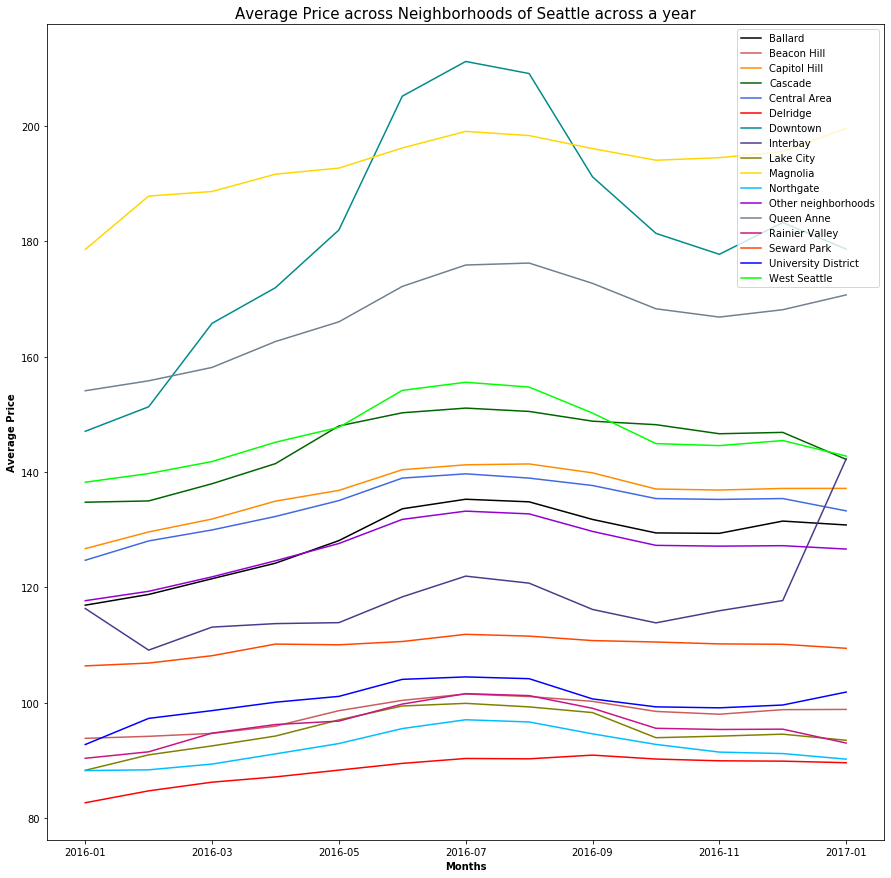

In [46]:
# Plot to see the variation of price across year
ax = None
colors = ['black','indianred','darkorange','darkgreen',
         'royalblue','red','darkcyan','darkslateblue',
         'olive','gold','deepskyblue','darkviolet',
         'slategrey','mediumvioletred','orangered','blue','lime']
for idx, group in enumerate(avg_price_neighborhood.groupby("neighbourhood_group_cleansed")):
    ax = group[1].plot(x="Year_Month",
                       y="price",
                       ax=ax,
                       label = group[1].neighbourhood_group_cleansed.unique()[0],
                       color=colors[idx])

plt.rcParams['figure.figsize'] = [15, 15]
plt.xlabel('Months', fontweight='bold', fontsize = 10)
plt.ylabel('Average Price', fontweight='bold', fontsize = 10)
plt.legend(fontsize=10,loc=1)
plt.title('Average Price across Neighborhoods of Seattle across a year',fontsize=15);
plt.show()